<a href="https://colab.research.google.com/github/izza1224/Visi_Komputer_TI_2C/blob/main/Praktikum_2_Klasifikasi_gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


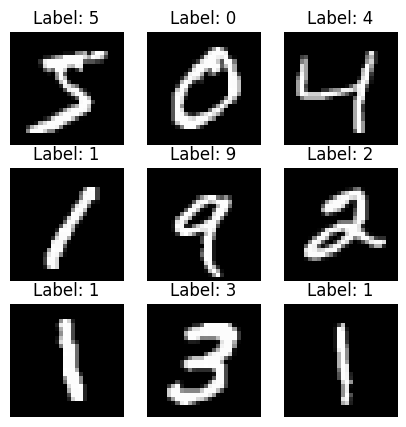

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i], cmap='gray')
 plt.title(f"Label: {y_train[i]}")
 plt.axis('off')
plt.show()


Tugas kecil: Cobalah ganti range(9) dengan range(25) untuk menampilkan lebih banyak  contoh. Apa yang Anda perhatikan dari bentuk tulisan tangan manusia?

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


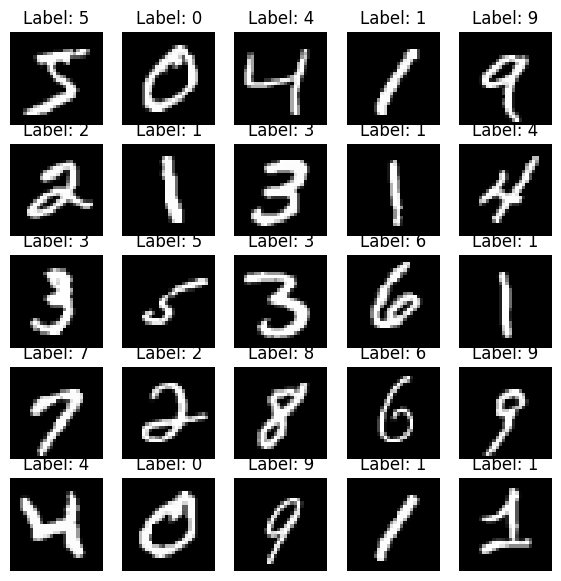

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning

In [3]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM  berat
y_pred = clf.predict(x_test_flat)
print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9101


Tugas kecil: Ubah kernel dari linear menjadi rbf. Bagaimana pengaruhnya terhadap  akurasi?

In [4]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0
# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM  berat
y_pred = clf.predict(x_test_flat)
print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9513


# Praktikum D3 – Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.8618 - loss: 0.4481 - val_accuracy: 0.9853 - val_loss: 0.0578
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.9804 - loss: 0.0641 - val_accuracy: 0.9873 - val_loss: 0.0440
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 85s 53ms/step - accuracy: 0.9867 - loss: 0.0435 - val_accuracy: 0.9860 - val_loss: 0.0490
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.9893 - loss: 0.0342 - val_accuracy: 0.9885 - val_loss: 0.0445
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.9927 - loss: 0.0231 - val_accuracy: 0.9882 - val_loss: 0.0413


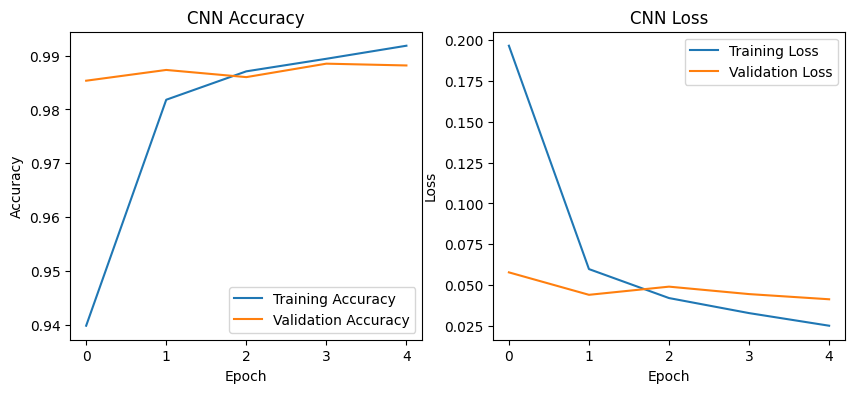

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Normalisasi dan reshape data
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn  = x_test.reshape(-1, 28, 28, 1) / 255.0

# Definisi model CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    # tambahan lapisan conv untuk meningkatkan akurasi
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train_cnn, y_train,
                    epochs=5,
                    validation_split=0.1,
                    batch_size=64)

# ===== Plot history =====
plt.figure(figsize=(10,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Tugas kecil: Tambahkan satu lapisan Conv2D lagi sebelum Flatten. Apakah akurasinya  meningkat?

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 60s 65ms/step - accuracy: 0.8890 - loss: 0.3561 - val_accuracy: 0.9855 - val_loss: 0.0478
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 73s 55ms/step - accuracy: 0.9850 - loss: 0.0480 - val_accuracy: 0.9892 - val_loss: 0.0418
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.9910 - loss: 0.0302 - val_accuracy: 0.9897 - val_loss: 0.0388
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.9930 - loss: 0.0208 - val_accuracy: 0.9910 - val_loss: 0.0352
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 58ms/step - accuracy: 0.9948 - loss: 0.0149 - val_accuracy: 0.9922 - val_loss: 0.0332


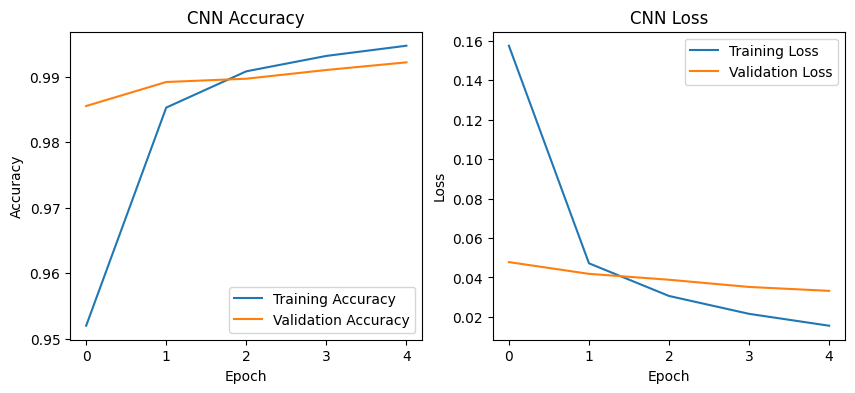

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Normalisasi dan reshape data
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn  = x_test.reshape(-1, 28, 28, 1) / 255.0

# Model CNN dengan tambahan Conv2D sebelum Flatten
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    # Tambahan lapisan Conv2D
    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train_cnn, y_train,
                    epochs=5,
                    validation_split=0.1,
                    batch_size=64)

# ===== Plot history =====
plt.figure(figsize=(10,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 39ms/step - accuracy: 0.3660 - loss: 1.7319 - val_accuracy: 0.5836 - val_loss: 1.1901
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 95s 49ms/step - accuracy: 0.5946 - loss: 1.1524 - val_accuracy: 0.6322 - val_loss: 1.0585
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.6434 - loss: 1.0118 - val_accuracy: 0.6488 - val_loss: 1.0033
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.6824 - loss: 0.9157 - val_accuracy: 0.6756 - val_loss: 0.9495
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7022 - loss: 0.8531 - val_accuracy: 0.6832 - val_loss: 0.9225
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.7280 - loss: 0.7806 - val_accuracy: 0.6912 - val_loss: 0.9239
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7401 - loss: 0.7404 - val_accuracy: 0.7098 - val_loss: 0.8763
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7674 -

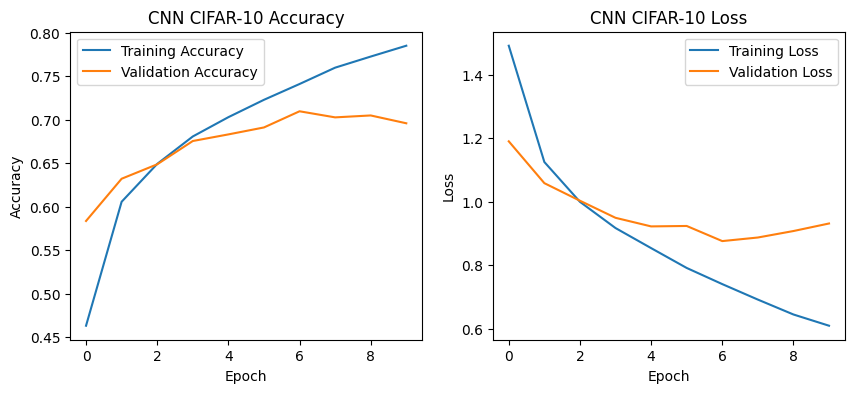

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
 layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),  layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, (3,3), activation='relu'),
 layers.MaxPooling2D((2,2)),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)
# ===== Plot history =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Tugas kecil: Coba tambahkan Dropout(0.5) sebelum lapisan Dense terakhir. Apa  pengaruhnya pada overfitting?

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 52s 72ms/step - accuracy: 0.2574 - loss: 1.9930 - val_accuracy: 0.4746 - val_loss: 1.4960
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 88s 81ms/step - accuracy: 0.4272 - loss: 1.5743 - val_accuracy: 0.5526 - val_loss: 1.2761
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 73s 69ms/step - accuracy: 0.4826 - loss: 1.4432 - val_accuracy: 0.5642 - val_loss: 1.2295
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 50s 72ms/step - accuracy: 0.5194 - loss: 1.3438 - val_accuracy: 0.6126 - val_loss: 1.1439
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 70ms/step - accuracy: 0.5381 - loss: 1.2951 - val_accuracy: 0.6356 - val_loss: 1.0738
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 49s 70ms/step - accuracy: 0.5560 - loss: 1.2335 - val_accuracy: 0.6110 - val_loss: 1.1013
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.5810 - loss: 1.1652 - val_accuracy: 0.6584 - val_loss: 0.9865
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.5916 - loss: 1.1446 - 

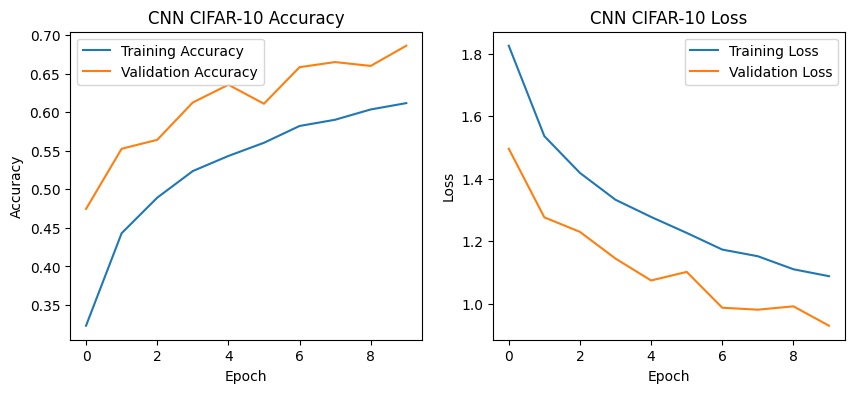

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# 1. Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# 2. CNN model dengan Dropout
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    # Tambahan Dropout
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

# 3. Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_split=0.1,
                    batch_size=64)

# 5. Plot history
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Praktikum D5 – Transfer Learning dengan Model Pra-Latih

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False,  input_shape=(32,32,3))
base_model.trainable = False
model = models.Sequential([
 base_model,
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Tugas kecil: Coba aktifkan 1–2 lapisan terakhir dari base_model (fine-tuning). Bagaimana  akurasinya berubah?

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 2217s 3s/step - accuracy: 0.5158 - loss: 1.3571 - val_accuracy: 0.6684 - val_loss: 0.9637
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 2183s 3s/step - accuracy: 0.7135 - loss: 0.8349 - val_accuracy: 0.7216 - val_loss: 0.8253
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 2301s 3s/step - accuracy: 0.7549 - loss: 0.7010 - val_accuracy: 0.7326 - val_loss: 0.8220
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 2270s 3s/step - accuracy: 0.7851 - loss: 0.6148 - val_accuracy: 0.7502 - val_loss: 0.7423
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 2319s 3s/step - accuracy: 0.8111 - loss: 0.5360 - val_accuracy: 0.7266 - val_loss: 0.8407


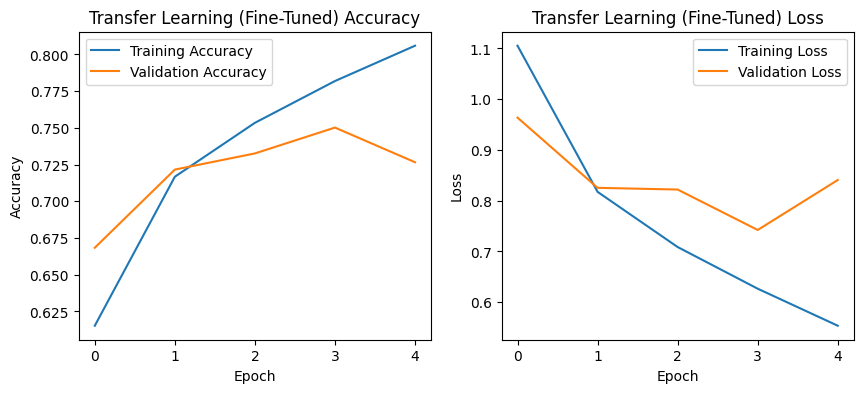

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# 2. Load base model VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Bekukan semua layer dulu, lalu aktifkan beberapa layer terakhir
base_model.trainable = True
for layer in base_model.layers[:-4]:   # ❗ hanya 4 lapisan terakhir ikut dilatih
    layer.trainable = False

# 3. Tambahkan classifier baru
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train
history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_split=0.1,
                    batch_size=64)

# 6. Plot history
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning (Fine-Tuned) Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning (Fine-Tuned) Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 105s 336ms/step
              precision    recall  f1-score   support

           0       0.39      0.69      0.50      1000
           1       0.45      0.48      0.46      1000
           2       0.35      0.25      0.29      1000
           3       0.28      0.32      0.30      1000
           4       0.50      0.33      0.40      1000
           5       0.38      0.45      0.41      1000
           6       0.47      0.51      0.49      1000
           7       0.45      0.46      0.45      1000
           8       0.71      0.25      0.37      1000
           9       0.41      0.42      0.41      1000

    accuracy                           0.41     10000
   macro avg       0.44      0.41      0.41     10000
weighted avg       0.44      0.41      0.41     10000



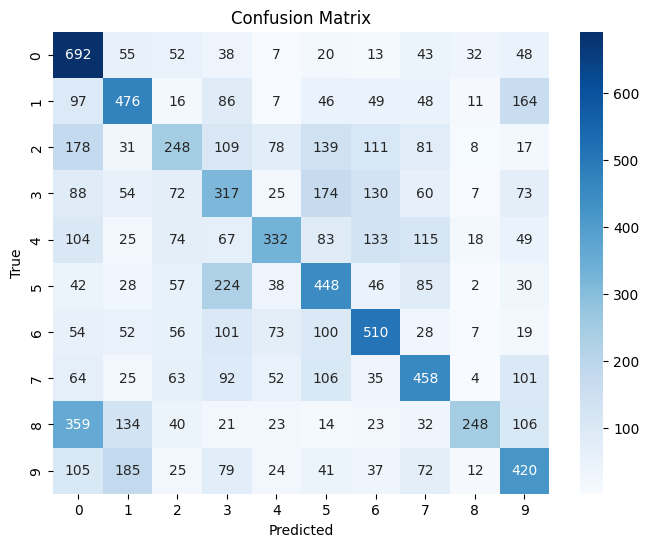

In [ ]:
# 1. Import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 2. Pastikan model sudah dilatih sebelumnya
# contoh sederhana:
# history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# 3. Prediksi data uji
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)   # ambil kelas dengan probabilitas tertinggi

# 4. Evaluasi lebih detail
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#Penugasan

Kode Upload & Preprocess

In [6]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload()   # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    mask = arr > np.mean(arr) * 0.8
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20
    img.thumbnail((20,20), Image.Resampling.LANCZOS)

    # Pad ke 28x28
    canvas = Image.new('L', (28,28), color=0)
    w,h = img.size
    canvas.paste(img, ((28-w)//2, (28-h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr[..., None]   # tambahkan channel dim (28,28,1)

    return canvas, arr


Saving Screenshot 2025-09-20 192612.png to Screenshot 2025-09-20 192612.png


Pilihan A: Prediksi dengan CNN (D3)

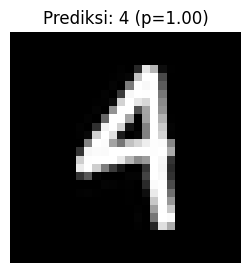

Rekap Prediksi (CNN):
Screenshot 2025-09-20 192612.png -> 4 (p=1.000)


In [8]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)  # x: (28,28,1)

    x_batch = np.expand_dims(x, axis=0)  # (1,28,28,1)
    probs = model.predict(x_batch, verbose=0)[0]  # output (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"{r[0]} -> {r[1]} (p={r[2]:.3f})")


Pilihan B: Prediksi dengan SVM (D2)

In [7]:
from sklearn.metrics import accuracy_score

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    _, x = preprocess_to_mnist_28x28(img_pil)   # x: (28,28,1)
    x_flat = x.reshape(1,-1)                    # (1,784)

    pred = int(clf.predict(x_flat)[0])
    conf = None

    results.append((fname, pred, conf))

    # Tampilkan hasil (gambar + prediksi)
    print(f"Prediksi SVM {fname}: {pred}")

# Rekap
print("\nRekap Prediksi (SVM):")
for r in results:
    print(f"{r[0]} -> {r[1]}")


Prediksi SVM Screenshot 2025-09-20 192612.png: 4

Rekap Prediksi (SVM):
Screenshot 2025-09-20 192612.png -> 4
